In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
results = pd.read_csv('results/2024-10-07.csv')
results.columns = ['prediction','compute_time','probability','accuracy','total_qoe','accuracy_qoe','delay_qoe','cpu_power','model','start_time','end_time']

# Define the model mapping
model_mapping = {
    "550e8400-e29b-41d4-a716-446655440000": "resnet152",
    "550e8400-e29b-41d4-a716-446655440001": "shufflenet_v2_x0_5",
    "550e8400-e29b-41d4-a716-446655440002": "densenet201",
    "550e8400-e29b-41d4-a716-446655440003": "mobilenet_v3_small",
    "550e8400-e29b-41d4-a716-446655440004": "resnext50_32x4d",
    "550e8400-e29b-41d4-a716-446655440005": "googlenet"
}

# Replace model IDs with names
results['model'] = results['model'].replace(model_mapping)
results['total_time'] = results['end_time'] - results['start_time']
results['daemon_overhead'] = results['total_time'] - results['compute_time']
results

EmptyDataError: No columns to parse from file

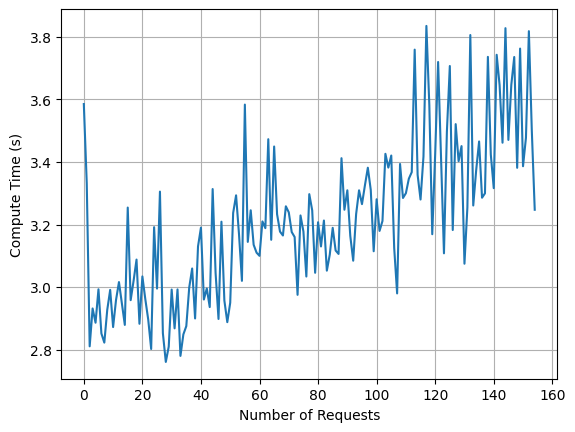

In [13]:
# plt.figure(figsize=(30, 6))
plt.plot(results['compute_time'])
plt.xlabel('Number of Requests')
plt.ylabel('Compute Time (s)')
plt.grid(True)
plt.show()

In [14]:
summary = results.groupby('model')[['accuracy', 'compute_time']].mean()
summary.columns = ['Mean Accuracy', 'Mean Compute Time (s)']
summary

,Mean Accuracy,Mean Compute Time (s)
model,,
resnet152,0.903226,3.216305


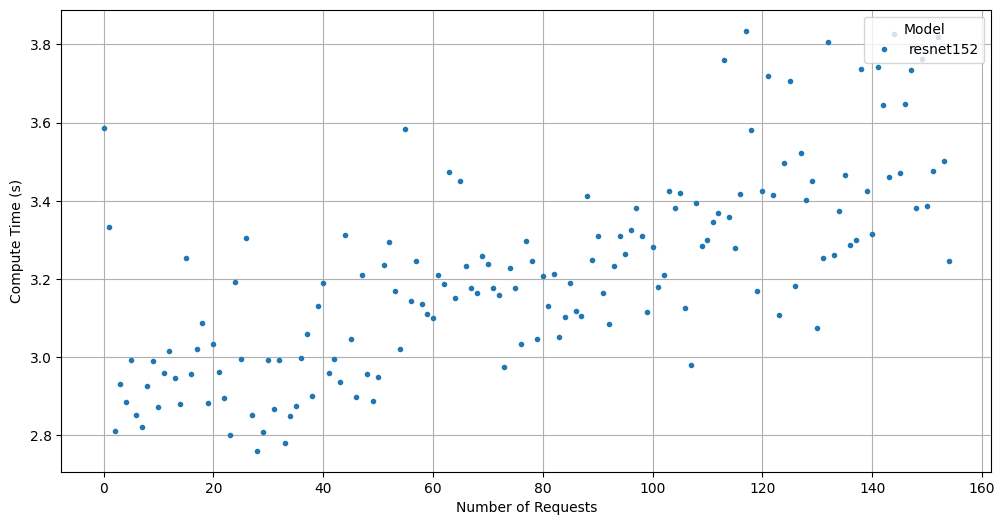

In [8]:

# Plot the data with different colors for each model
plt.figure(figsize=(12, 6))

# Group by model and plot each group separately
for model, group in results.groupby('model'):
    plt.plot(group['compute_time'], marker='.', linestyle='', label=model)

plt.xlabel('Number of Requests')
plt.ylabel('Compute Time (s)')

plt.grid(True)
plt.legend(title='Model', loc="upper right")
plt.show()

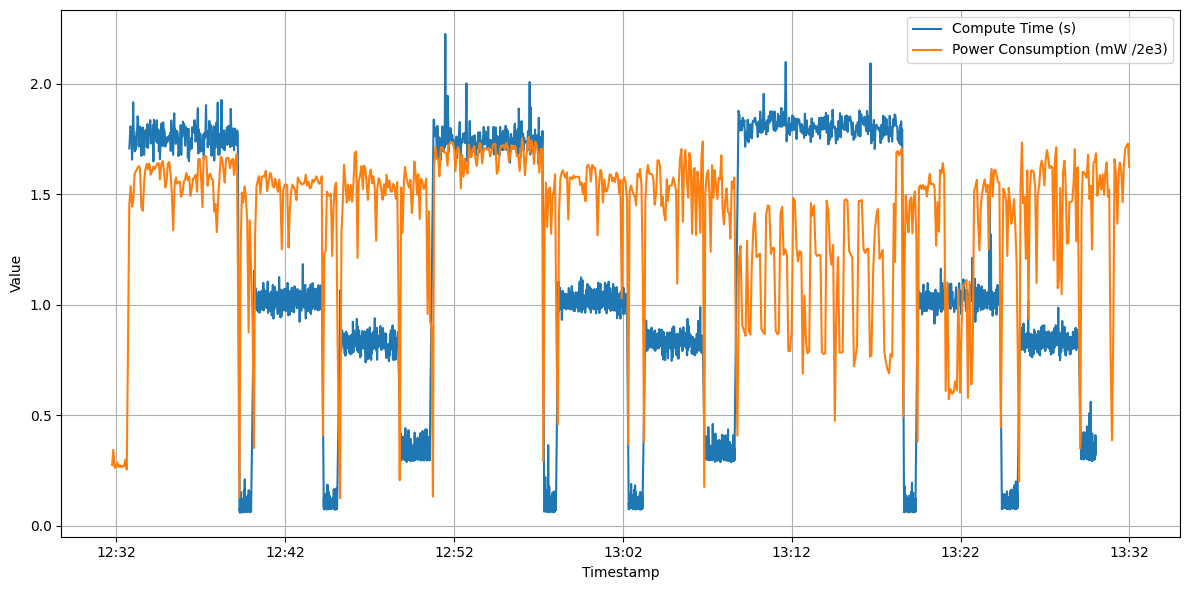

In [148]:
# Plot the data
plt.style.use('default')
plt.figure(figsize=(12, 6), facecolor='white')

plt.plot(results['timestamp'], results['compute_time'], label='Compute Time (s)')
plt.plot(power['timestamp'][10:], power['cpu_avg_milliwatt'][10:]/2e3, label='Power Consumption (mW /2e3)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.legend(loc="upper right")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
plt.tight_layout()
plt.show()